# Capstone Project

## *Exploring Clustering Algorithms*

### Table of Contents

* [Topic 1](#topic-1)
* [Topic 2](#topic-2)

### Import Libraries & Read in Data

In [58]:
### STANDARD
import pandas as pd 
import numpy as np
import re
### VISUALIZATIONS
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
### PREPROCESSING
from sklearn.preprocessing import StandardScaler
### MODELING
from sklearn.cluster import KMeans, DBSCAN
### METRICS
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score, v_measure_score

## options
import sklearn
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 100
pd.set_option('max_colwidth', 100)

In [95]:
### read in data
data = pd.read_csv('../data/hiphop_clustering.csv')

In [96]:
data.head(2)

,artist_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,J. Cole,2JvzF1RMd7lE3KmFlsyZD8,0.96,0.149,0.837,0.364,0.0,0.271,-11.713,0.2760,123.984,0.463
1,Meek Mill,2IRZnDFmlqMuOrYOLnZZyc,0.95,0.259,0.889,0.496,0.0,0.252,-6.365,0.0905,86.003,0.544


In [94]:
data.columns

Index(['artist_name', 'track_id', 'popularity', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence'],
      dtype='object')

In [51]:
data.head(2)

,genre,track_id,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,is_popular
0,Hip-Hop,2JvzF1RMd7lE3KmFlsyZD8,0.96,0.149,0.837,0.364,0.0,0.271,-11.713,0.2760,123.984,0.463,1
1,Hip-Hop,2IRZnDFmlqMuOrYOLnZZyc,0.95,0.259,0.889,0.496,0.0,0.252,-6.365,0.0905,86.003,0.544,1


In [97]:
### Select data
features = ['popularity', 'danceability', 'energy', 'speechiness', 'tempo', 'valence']
X = data[features]

## Some EDA <a class="anchor" id="topic-1"></a>
<hr/>

In [52]:
cmap = colors.ListedColormap(['tab:blue', 'tab:red'])

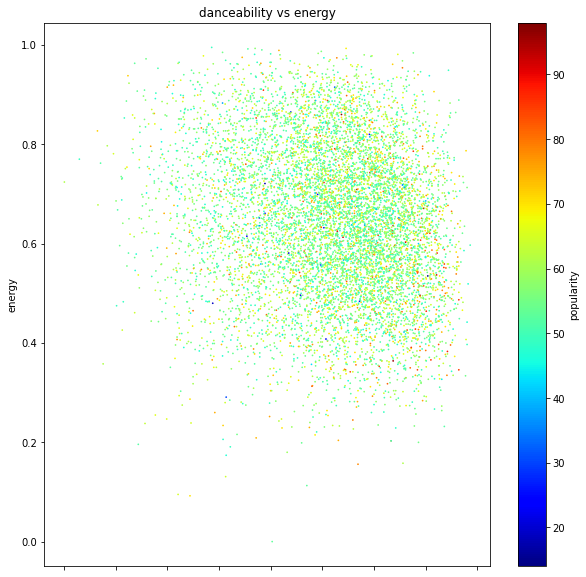

In [43]:
x_var = 'danceability'
y_var ='energy'

data.plot(kind='scatter', 
          x=x_var, y=y_var,
#           c='is_popular', 
#           colormap=cmap, 
          c='popularity',
          colormap='jet',
          s=0.5, 
          figsize=(10,10), 
          title=f'{x_var} vs {y_var}'
         );


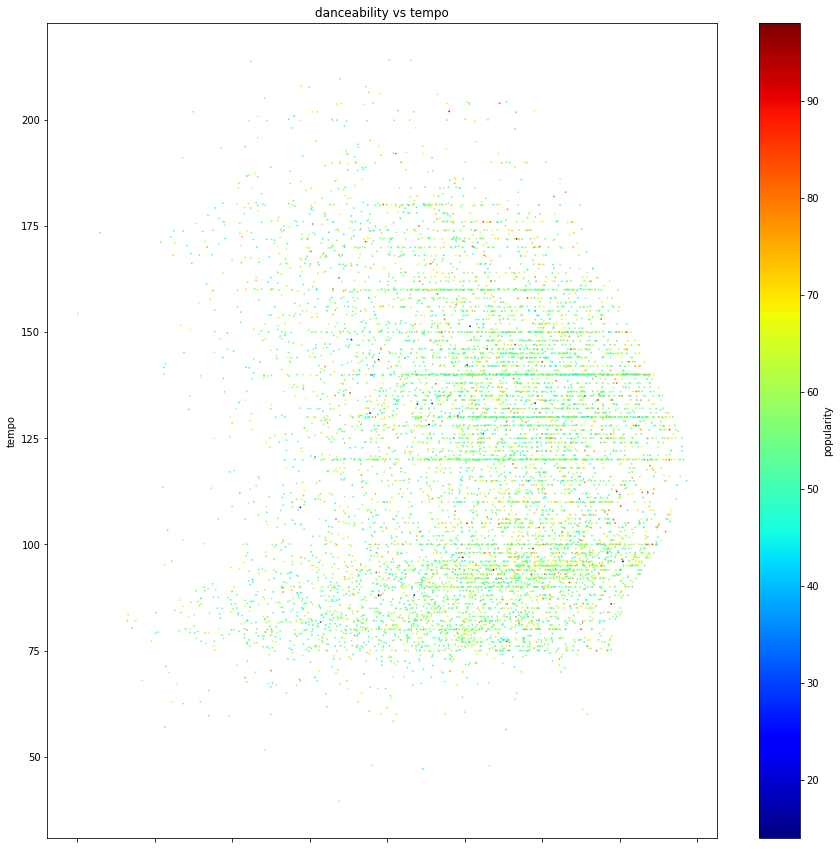

In [44]:
x_var = 'danceability'
y_var ='tempo'

data.plot(kind='scatter', 
          x=x_var, y=y_var,
#           c='is_popular', 
#           colormap=cmap,
          c='popularity',
          colormap='jet',
          s=0.5, 
          figsize=(15,15), 
          title=f'{x_var} vs {y_var}'
         );

## Fuck it, Let's do some Clustering <a class="anchor" id="topic-2"></a>
<hr/>

In [98]:
ss = StandardScaler()
X_s = ss.fit_transform(X)

In [87]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_s)
print('Silhouette Score: ', silhouette_score(X_s, kmeans.labels_))

Silhouette Score:  0.15001589061434734


In [74]:
kmeans.labels_

array([0, 0, 0, ..., 1, 0, 1], dtype=int32)

In [100]:
### Add cluster labels to dataframe
data['cluster'] = kmeans.labels_
data.head(2)

,artist_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,cluster
0,J. Cole,2JvzF1RMd7lE3KmFlsyZD8,0.96,0.149,0.837,0.364,0.0,0.271,-11.713,0.2760,123.984,0.463,0
1,Meek Mill,2IRZnDFmlqMuOrYOLnZZyc,0.95,0.259,0.889,0.496,0.0,0.252,-6.365,0.0905,86.003,0.544,1


In [82]:
def plot_kmeans(df, col1, col2, model):
    ### note: only uses 10 colors right now so must have clusters < 11
    plot_df = df.copy()
    
    plt.figure(figsize=(7,7));
    
    kval = np.unique(model.labels_).shape[0]
    
    ## Create a dataframe for cluster_centers (centroids)
    unscaled_centers = ss.inverse_transform(model.cluster_centers_)
    # unscaled_centers
    centroids = pd.DataFrame(unscaled_centers, columns = df.columns)
    
    import matplotlib.colors as mcolors   ### because I'm lazy and didn't want to type a list of colors
    color_list = list(mcolors.TABLEAU_COLORS.keys())
    colors = color_list[:kval]
    
    ## add cluster info to df
    plot_df['cluster'] = model.labels_
    plot_df['color'] = plot_df['cluster'].map(lambda p: colors[p])
    
    ## Plot scatter by cluster / color, and centroids
    ax = df.plot(    
        kind='scatter', 
        x=col1,
        y=col2,
        s=0.75,
        c = plot_df['color'],
        title=f'Clusters with Centroids for k={kval}',
        figsize=(15,15)
    )

    centroids.plot(
        kind='scatter', 
        x=col1,
        y=col2,
        marker="*", edgecolor='black', c=colors, s=550,
        ax=ax
    );
    
    return plot_df

<Figure size 504x504 with 0 Axes>

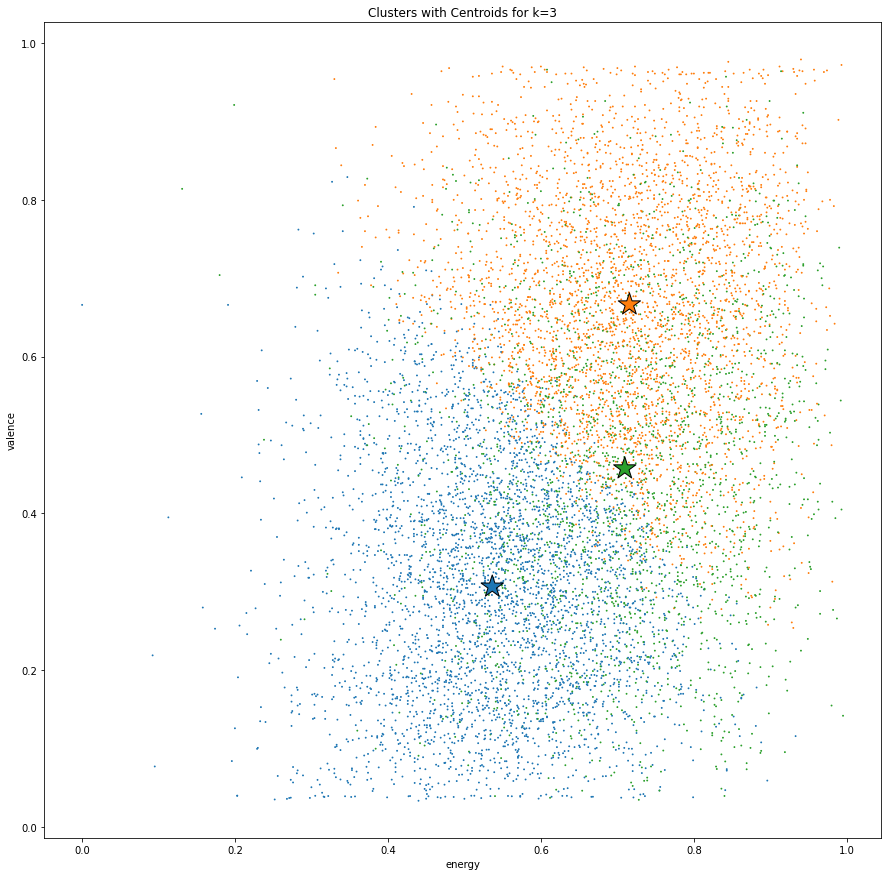

In [88]:
results = plot_kmeans(X, 'energy', 'valence', kmeans)

,popularity,danceability,energy,speechiness,tempo,valence,cluster,color
0,0.96,0.837,0.364,0.2760,123.984,0.463,0,tab:blue
1,0.95,0.889,0.496,0.0905,86.003,0.544,0,tab:blue
2,0.93,0.837,0.636,0.0860,145.972,0.274,0,tab:blue
3,0.88,0.942,0.383,0.5650,100.021,0.380,0,tab:blue
4,0.92,0.729,0.625,0.0315,146.034,0.261,0,tab:blue


<Figure size 504x504 with 0 Axes>

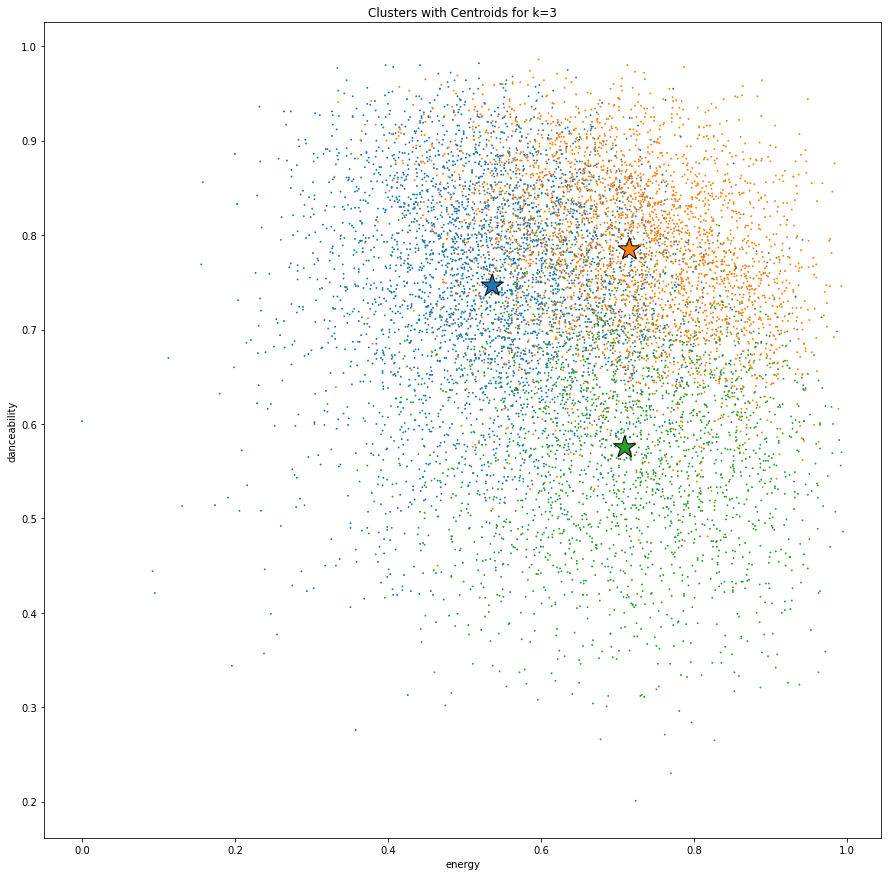

In [89]:
results = plot_kmeans(X, 'energy', 'danceability', kmeans)

<Figure size 504x504 with 0 Axes>

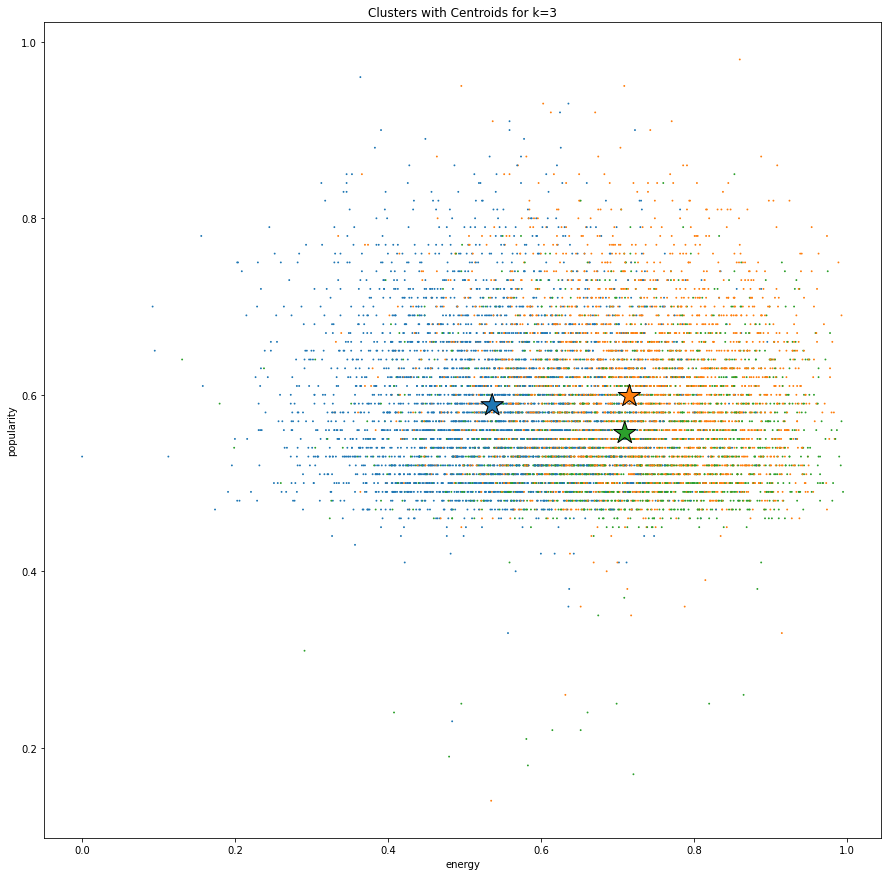

In [90]:
results = plot_kmeans(X, 'energy', 'popularity', kmeans)

<Figure size 504x504 with 0 Axes>

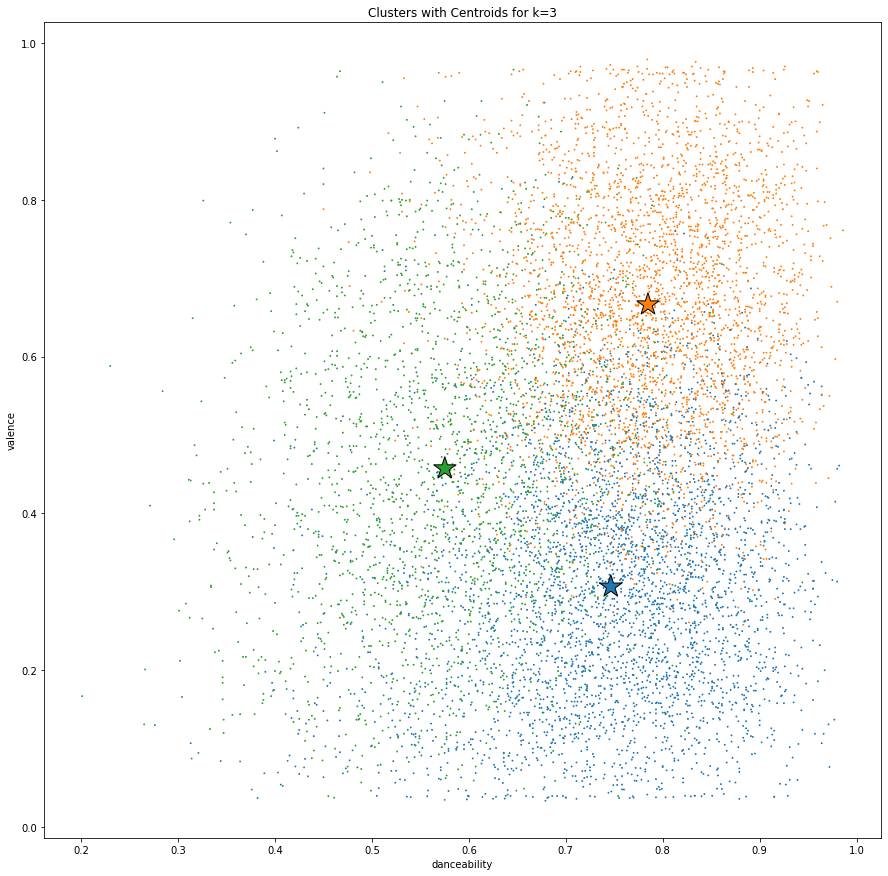

In [91]:
results = plot_kmeans(X, 'danceability', 'valence', kmeans)

In [101]:
data.groupby('cluster').mean().T

cluster,0,1,2
popularity,0.588074,0.598576,0.556498
acousticness,0.182057,0.156802,0.195505
danceability,0.746375,0.784776,0.575078
energy,0.536423,0.715633,0.709903
instrumentalness,0.015348,0.009351,0.007179
liveness,0.172703,0.199231,0.250541
loudness,-7.780946,-6.068782,-6.537473
speechiness,0.161397,0.184218,0.309042
tempo,120.840631,114.549417,130.041823
valence,0.306641,0.666648,0.457210


<AxesSubplot:ylabel='cluster'>

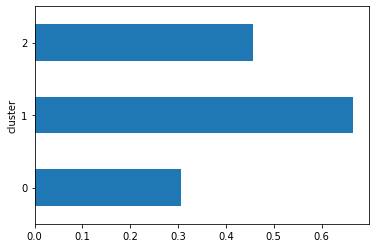

In [103]:
data.groupby('cluster')['valence'].mean().plot(kind='barh')

<AxesSubplot:ylabel='cluster'>

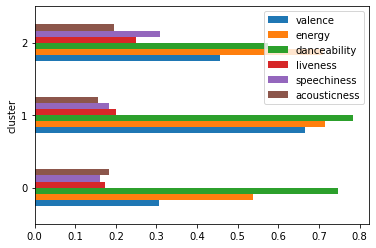

In [111]:
data.groupby('cluster').mean()[['valence', 'energy','danceability','liveness', 'speechiness', 'acousticness']].plot(kind='barh')

<AxesSubplot:ylabel='cluster'>

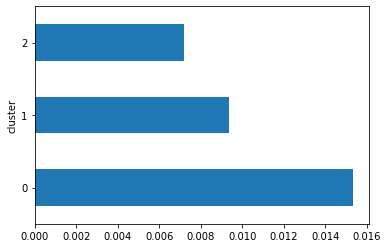

In [105]:
data.groupby('cluster')['instrumentalness'].mean().plot(kind='barh')

<AxesSubplot:ylabel='cluster'>

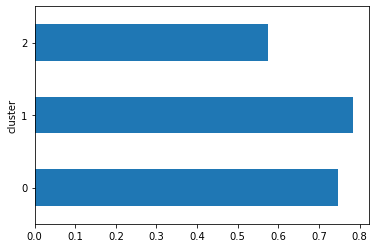

In [106]:
data.groupby('cluster')['danceability'].mean().plot(kind='barh')

<AxesSubplot:ylabel='cluster'>

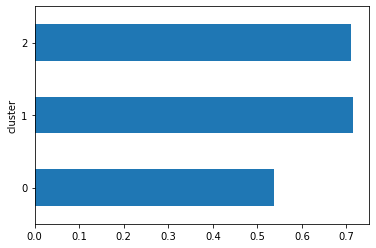

In [107]:
data.groupby('cluster')['energy'].mean().plot(kind='barh')